### Question 6 : titanic dataset

### Importing  libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn import metrics, preprocessing

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Importing Dataset

In [65]:
T = pd.read_csv('Titanictrain.csv',index_col=0)
T.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_cat,Titles
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2,Small,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,Single,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,Single,Mr


### Understanding the Data

In [35]:
T.shape

(891, 14)

In [36]:
T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         891 non-null object
Embarked      891 non-null object
family        891 non-null int64
family_cat    891 non-null object
Titles        891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 104.4+ KB


In [6]:
T.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
family        0
family_cat    0
Titles        0
dtype: int64

There are no null values in our data

### Checking the data types and correcting data types

In [8]:
T.dtypes

Survived        int64
Pclass          int64
Name           object
Sex            object
Age           float64
SibSp           int64
Parch           int64
Ticket         object
Fare          float64
Cabin          object
Embarked       object
family          int64
family_cat     object
Titles         object
dtype: object

In [9]:
T.Survived = T.Survived.astype(object)
T.Pclass = T.Pclass.astype(object)
T.SibSp = T.SibSp.astype(object)
T.Parch = T.Parch.astype(object)
T.dtypes

Survived       object
Pclass         object
Name           object
Sex            object
Age           float64
SibSp          object
Parch          object
Ticket         object
Fare          float64
Cabin          object
Embarked       object
family          int64
family_cat     object
Titles         object
dtype: object

### Analysing the Target Variable

In [255]:
T['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [256]:
T['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

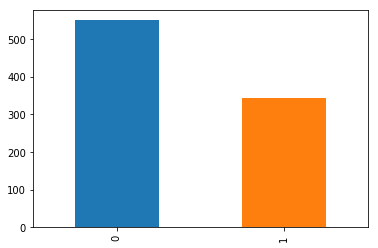

In [257]:
T['Survived'].value_counts().plot.bar()

### Univariate Analysis

In [11]:
print(T['Pclass'].value_counts(),"\n")


3    491
1    216
2    184
Name: Pclass, dtype: int64 



In [14]:
print(T['Embarked'].value_counts(),"\n")


S    646
C    168
Q     77
Name: Embarked, dtype: int64 



In [15]:
print(T['Sex'].value_counts(),"\n")


male      577
female    314
Name: Sex, dtype: int64 



In [16]:
print(T['SibSp'].value_counts(),"\n")


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 



In [17]:
print(T['Parch'].value_counts(),"\n")


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 



In [18]:
print(T['family_cat'].value_counts())

Single    537
Small     292
Large      62
Name: family_cat, dtype: int64


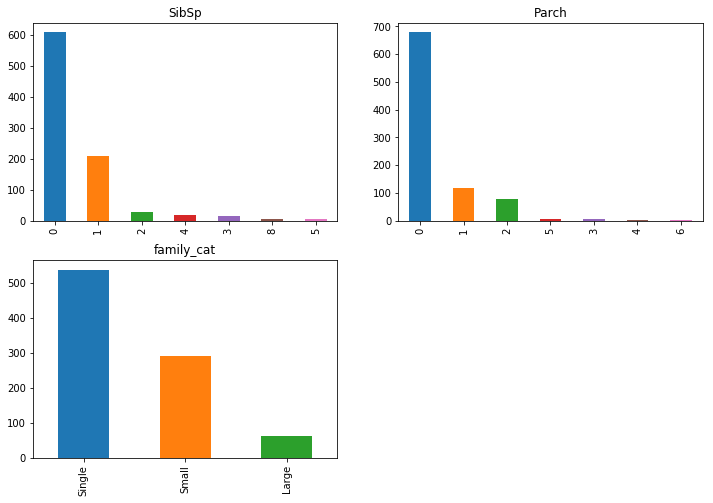

In [19]:
plt.figure(figsize=(12,8))

plt.subplot(221) 
T['SibSp'].value_counts().plot.bar(title='SibSp')

plt.subplot(222) 
T['Parch'].value_counts().plot.bar(title='Parch')

plt.subplot(223) 
T['family_cat'].value_counts().plot.bar(title='family_cat')

plt.show()

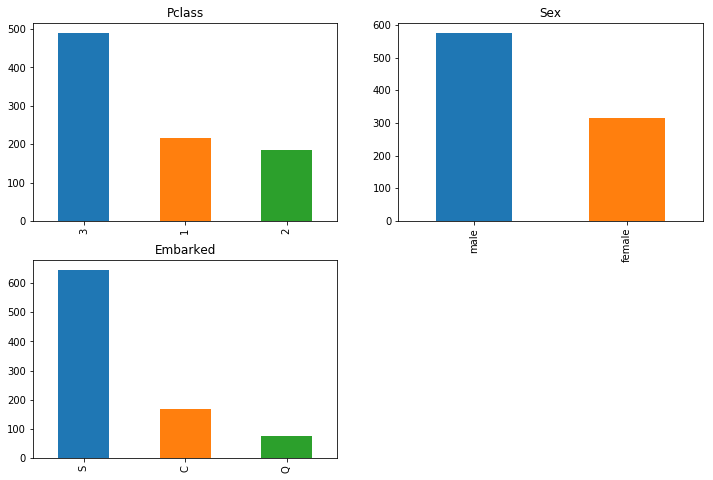

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(221) 
T['Pclass'].value_counts().plot.bar(title='Pclass')

plt.subplot(222) 
T['Sex'].value_counts().plot.bar(title='Sex')

plt.subplot(223) 
T['Embarked'].value_counts().plot.bar(title='Embarked')

plt.show()

In [21]:
T.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.133749,13.289756,0.42,22.0000,26.0000,37.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
family,891.0,1.904602,1.613459,1.00,1.0000,1.0000,2.0,11.0000


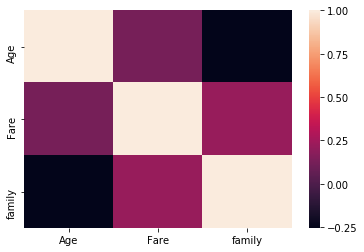

In [262]:
sns.heatmap(T.corr())

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


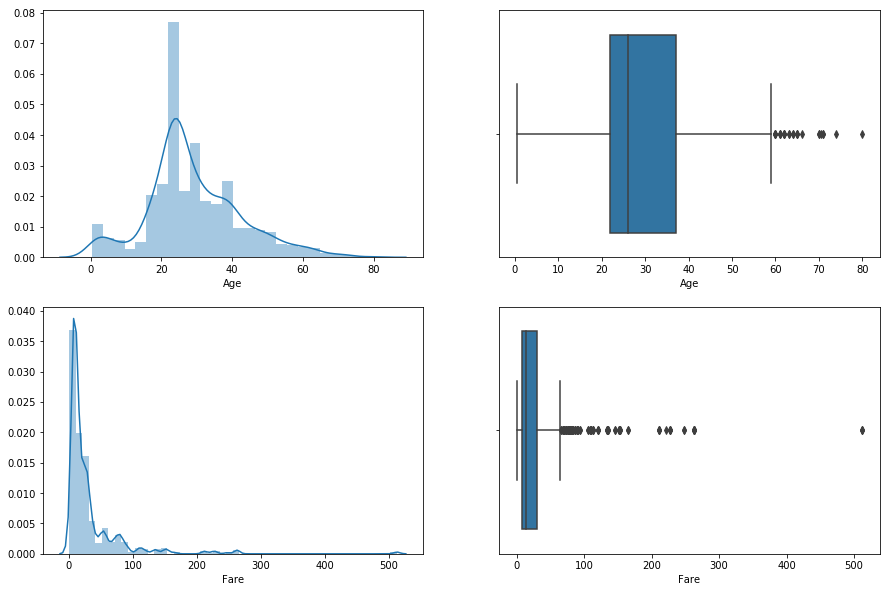

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(T['Age'])

plt.subplot(222)
sns.boxplot(T['Age'])

plt.subplot(223)
sns.distplot(T['Fare'])

plt.subplot(224)
sns.boxplot(T['Fare'])

plt.show()

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


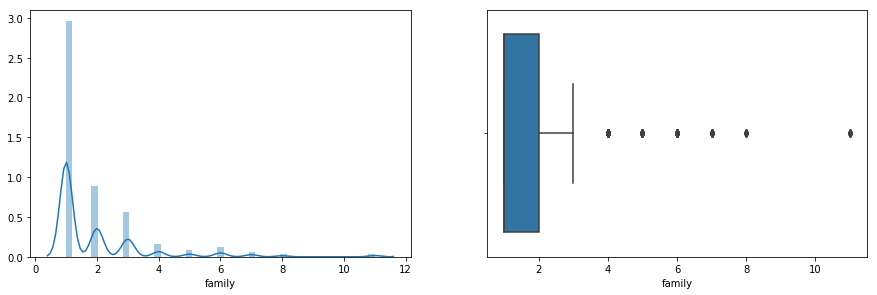

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(T['family'])

plt.subplot(222)
sns.boxplot(T['family'])

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


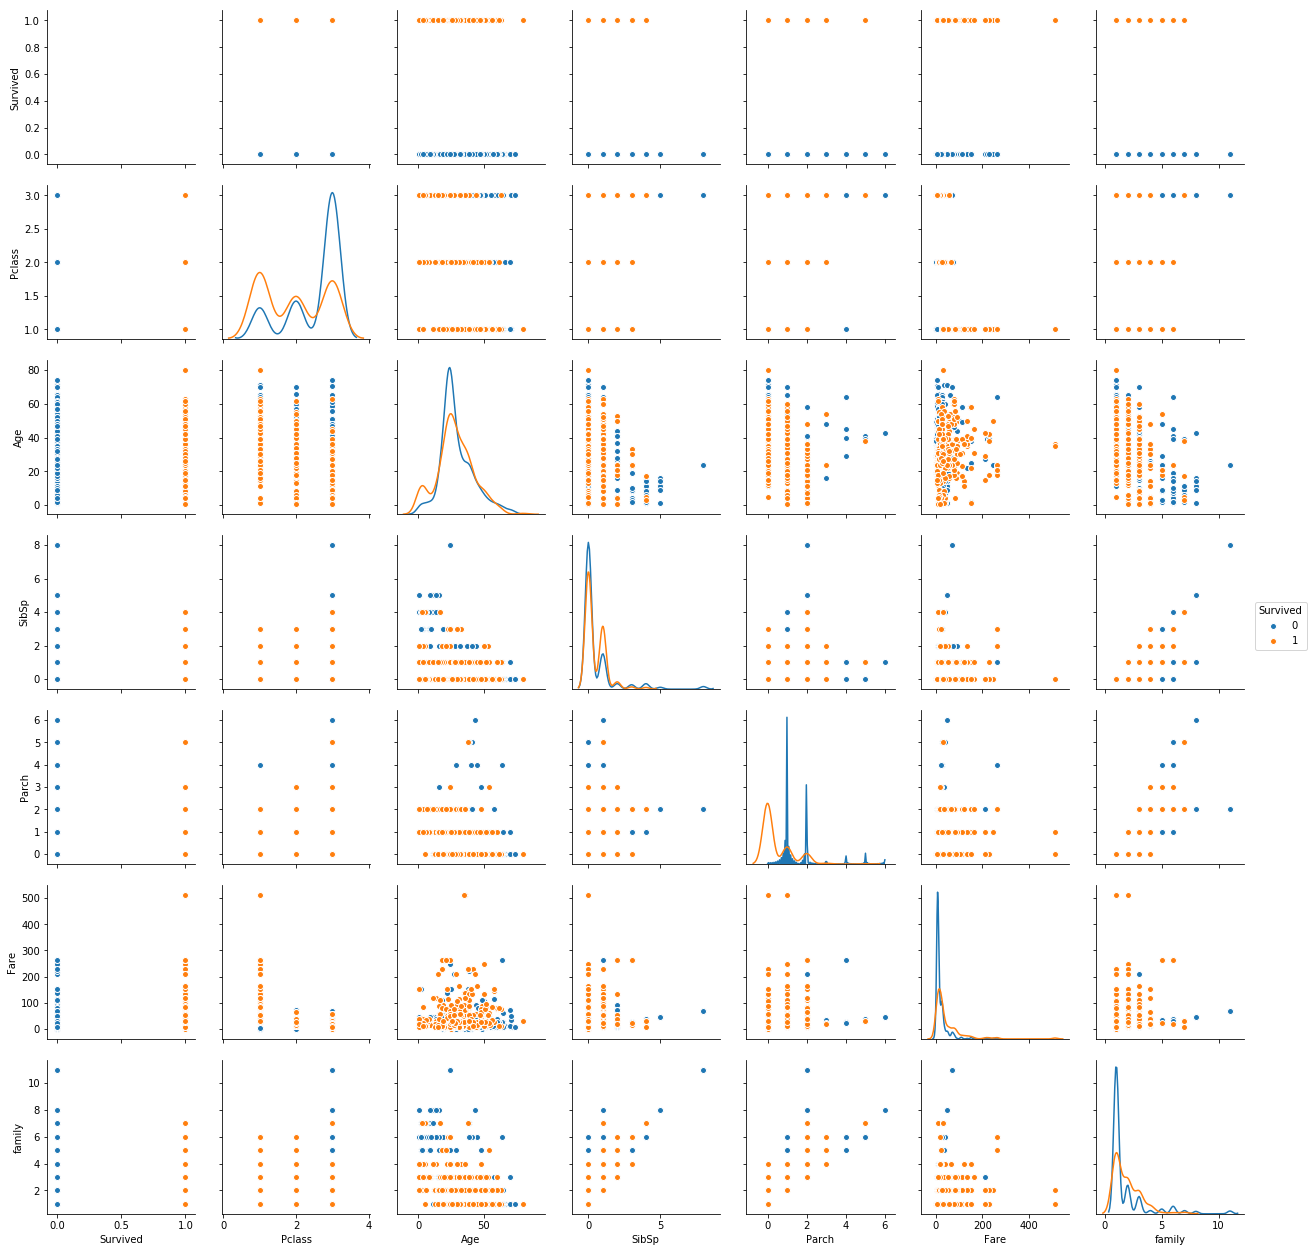

In [66]:
sns.pairplot(data=T, diag_kind= "kde", hue= "Survived"  )

### Outlier Treatment

In [37]:
T['Age'] = (T['Age']-np.min(T['Age']))/(np.max(T['Age'])-np.min(T['Age']))
T['Fare'] = (T['Fare']-np.min(T['Fare']))/(np.max(T['Fare'])-np.min(T['Fare']))
T['family'] = (T['family']-np.min(T['family']))/(np.max(T['family'])-np.min(T['family']))
T.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_cat,Titles
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,B96 B98,S,0.1,Small,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C,0.1,Small,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,B96 B98,S,0.0,Single,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S,0.1,Small,Mrs
5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,B96 B98,S,0.0,Single,Mr


### Dropping the variables which are not significant

In [38]:
T1 = T.drop(['Cabin','Ticket','Name','SibSp','Parch','family'], axis=1)
T1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_cat,Titles
PassengerId,,,,,,,,
1,0,3,male,0.271174,0.014151,S,Small,Mr
2,1,1,female,0.472229,0.139136,C,Small,Mrs
3,1,3,female,0.321438,0.015469,S,Single,Miss
4,1,1,female,0.434531,0.103644,S,Small,Mrs
5,0,3,male,0.434531,0.015713,S,Single,Mr


### Dummy Creation

In [39]:
T2 = pd.get_dummies(T1,columns=['Pclass','Sex','Embarked','family_cat','Titles'],drop_first=True)

In [27]:
T2.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'family_cat_Single', 'family_cat_Small',
       'Titles_ Miss', 'Titles_ Mr', 'Titles_ Mrs', 'Titles_Others'],
      dtype='object')

### Splitting the data 

In [40]:
x = T2.drop(['Survived'],axis=1)
y = T2['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
x_train.shape,y_train.shape

((623, 13), (623,))

### Applying Basic Models

In [41]:
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_lr)

0.8395522388059702

In [42]:
dtree = DecisionTreeClassifier()
model_dtree = dtree.fit(x_train,y_train)
pred_dtree = model_dtree.predict(x_test)
metrics.accuracy_score(y_test, pred_dtree)

0.75

In [43]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
metrics.accuracy_score(y_test, pred_knn)

0.8171641791044776

In [44]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)
metrics.accuracy_score(y_test, pred_rf)

0.8059701492537313

### Voting Classifier

In [45]:
voting_model = VotingClassifier([('lr', lr),('dtree', dtree),('knn',knn),('rf', rf)], voting='hard')
voting_model.fit(x_train, y_train)
voting_predict = voting_model.predict(x_test)
metrics.accuracy_score(y_test, voting_predict)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.835820895522388

### Bagging 

In [46]:
bagg = BaggingClassifier()
bagg_param = {
    'n_estimators':[5,10,15,20,25],
    'oob_score':[True,False],
    'random_state':[123]
}

grid_search = GridSearchCV(estimator=bagg, param_grid=bagg_param, cv=5)
cv_grid = grid_search.fit(x_train,y_train)
cv_grid.best_params_

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probabl

{'n_estimators': 20, 'oob_score': True, 'random_state': 123}

### Bagging

In [53]:
bagg_dt = BaggingClassifier(base_estimator=dtree, n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_dt = bagg_dt.fit(x_train,y_train)
pred_bagg_dt = model_bagg_dt.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_dt)

0.8134328358208955

In [54]:
bagg_rf = BaggingClassifier(base_estimator=rf,n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_rf = bagg_rf.fit(x_train,y_train)
pred_bagg_rf = model_bagg_rf.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_rf)

0.8283582089552238

In [55]:
bagg_knn = BaggingClassifier(base_estimator=knn,n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_knn = bagg_knn.fit(x_train,y_train)
pred_bagg_knn = model_bagg_knn.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_knn)

0.8283582089552238

In [56]:
bagg_lr = BaggingClassifier(base_estimator=lr,n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_lr = bagg_lr.fit(x_train,y_train)
pred_bagg_lr = model_bagg_lr.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_lr)

0.8395522388059702

### Adaptive Boosting

In [57]:
adb_lr = AdaBoostClassifier(lr, n_estimators=10, learning_rate=1)
adb_lr.fit(x_train,y_train)
pred_adb_lr = adb_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_adb_lr)

0.8022388059701493

In [58]:
adb_rf = AdaBoostClassifier(rf, n_estimators=10, learning_rate=1)
adb_rf.fit(x_train,y_train)
pred_adb_rf = adb_rf.predict(x_test)
metrics.accuracy_score(y_test,pred_adb_rf)

0.7798507462686567

In [59]:
adb_dt = AdaBoostClassifier(dtree, n_estimators=10, learning_rate=1)
adb_dt.fit(x_train,y_train)
pred_adb_dt = adb_dt.predict(x_test)
metrics.accuracy_score(y_test,pred_adb_dt)

0.8134328358208955

### XG Boosting

In [60]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
metrics.accuracy_score(y_test,pred_xgb)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8432835820895522

### Cross Validation

In [61]:
l = []
for model in [lr,dtree,knn,rf,bagg_dt,bagg_rf,adb_lr,adb_dt,adb_rf,xgb]:
    Scores = cross_val_score(model, x, y, scoring='accuracy', cv=5)
    l.append(Scores.mean())
l

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

[0.822670719455051,
 0.7800297327422248,
 0.802533524695305,
 0.8081327419411466,
 0.8148178922734235,
 0.8294311946256933,
 0.7856103315605043,
 0.7980138925386917,
 0.7913165427034027,
 0.8361791156566081]

### Voting

In [62]:
voting_model = VotingClassifier([('lr', lr),('dtree', dtree),('knn',knn),('rf', rf),
                                 ('bagg_dt',bagg_dt),('bagg_rf',bagg_rf),('adb_lr',adb_lr),
                                ('adb_dt',adb_dt),('adb_rf',adb_rf),('xgb',xgb)], voting='hard')
voting_model.fit(x_train, y_train)
voting_predict = voting_model.predict(x_test)
metrics.accuracy_score(y_test, voting_predict)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8283582089552238

Our Model has give the accuracy of 84.32% with all the models in account.